In [1]:
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import itertools

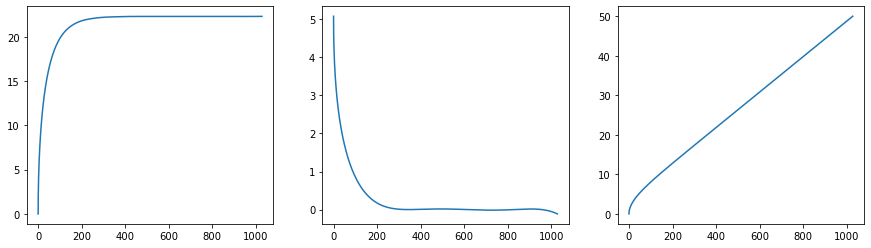

In [2]:
Zb = zb.Airplane()
R = Zb.takeOff_Kinematic_EDO()
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(R[1], R[2])
ax[1].plot(R[1], R[3])
ax[2].plot(R[1], R[0])

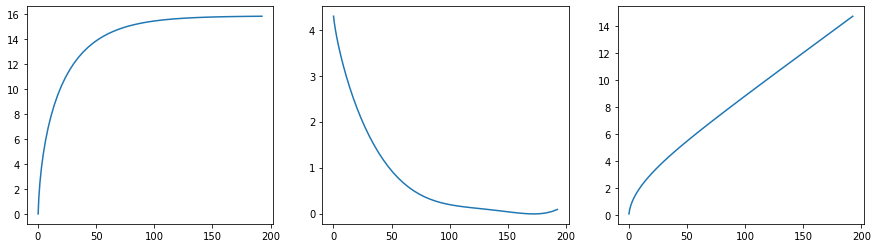

In [12]:
Zb = zb.Airplane()
R = Zb.takeOff_Kinematic_EDO()
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(R[1], R[2])
ax[1].plot(R[1], R[3])
ax[2].plot(R[1], R[0])

In [4]:
loc= 'D:/outputs_aviões.xlsx'
df =pd.read_excel(loc, index_col=0)

In [7]:
df.Slo_EDO.describe()

count    125000.000000
mean         89.290069
std          99.370901
min           9.930534
25%          26.092750
50%          44.276070
75%          93.136136
max         313.188716
Name: Slo_EDO, dtype: float64

In [17]:
d = df.copy()
d['Mo'] = d['Af']*d['AR']*(df['S']**2)
d['P'] = (1/(d['Mo']*(d['Slo_EDO']**2)))*1000

d = d[(d['Slo_EDO'] > 3) & (d['Slo_EDO'] <= 50)]

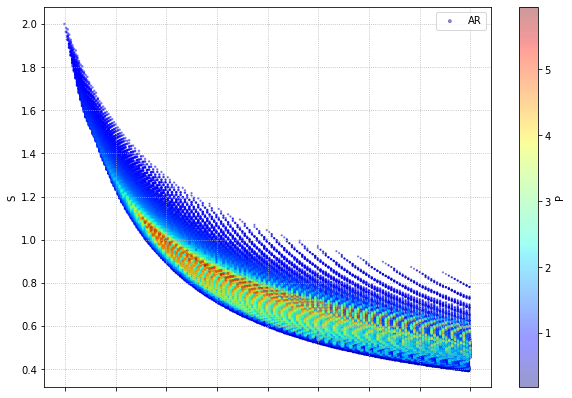

In [18]:
d.plot(kind='scatter', x='Slo_EDO', y='S', alpha=.4, 
            s=d['AR'], label='AR', figsize=(10,7), 
            c='P', cmap=plt.get_cmap('jet'), colorbar=True)

plt.grid(linestyle='dotted') 

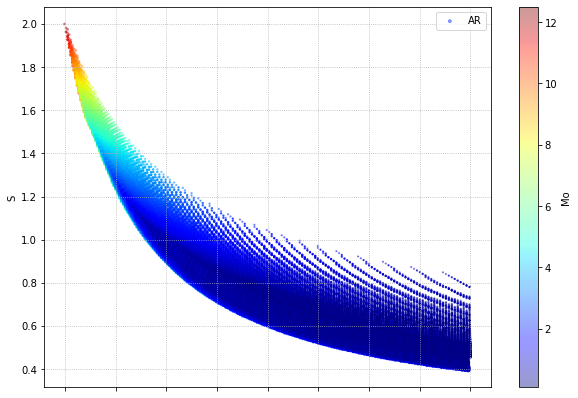

In [19]:
d.plot(kind='scatter', x='Slo_EDO', y='S', alpha=.4, 
            s=d['AR'], label='AR', figsize=(10,7), 
            c='Mo', cmap=plt.get_cmap('jet'), colorbar=True)

plt.grid(linestyle='dotted') 